# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [1]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [2]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [3]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[07-17 11:49:28][INFO] 2025-07-17 11:49:28.384997
[07-17 11:49:28][INFO] 2025-07-17 11:49:28.498111
[07-17 11:49:28][INFO] Se ajustarán 2 parámetros.
[07-17 11:49:28][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[07-17 11:49:29][INFO] Se ajustarán 2 parámetros.
[07-17 11:49:29][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


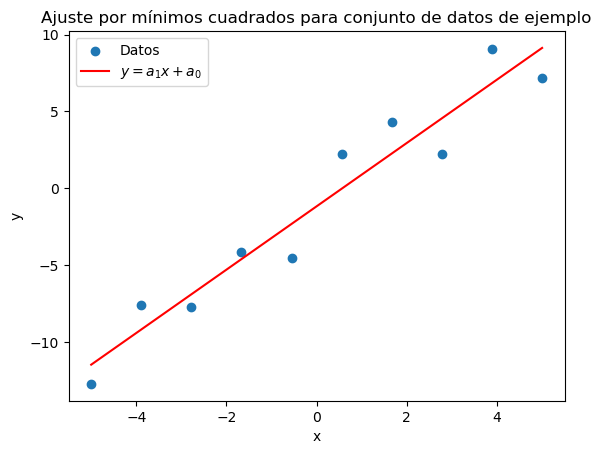

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [5]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

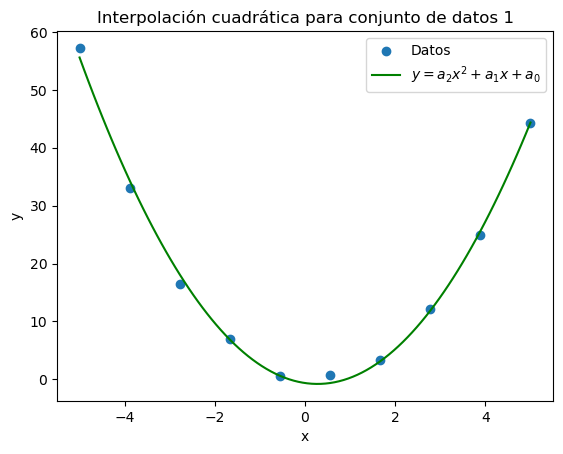

In [90]:
import numpy as np

# Interpolación cuadrática para el conjunto de datos 1
import matplotlib.pyplot as plt

# Ajuste cuadrático: y = a2*x^2 + a1*x + a0
coef = np.polyfit(xs1, ys1, 2)
a2, a1, a0 = coef

xq = np.linspace(min(xs1), max(xs1), 100)
yq = a2 * xq**2 + a1 * xq + a0

plt.scatter(xs1, ys1, label="Datos")
plt.plot(xq, yq, color="green", label=r"$y = a_2 x^2 + a_1 x + a_0$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación cuadrática para conjunto de datos 1")
plt.legend()
plt.show()

## Conjunto de datos 2

In [7]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

[07-17 13:18:35][INFO] Se ajustarán 2 parámetros.
[07-17 13:18:35][INFO] 
[[20.         22.0372     19.05727035]
 [ 0.         10.54683259 14.94655314]]


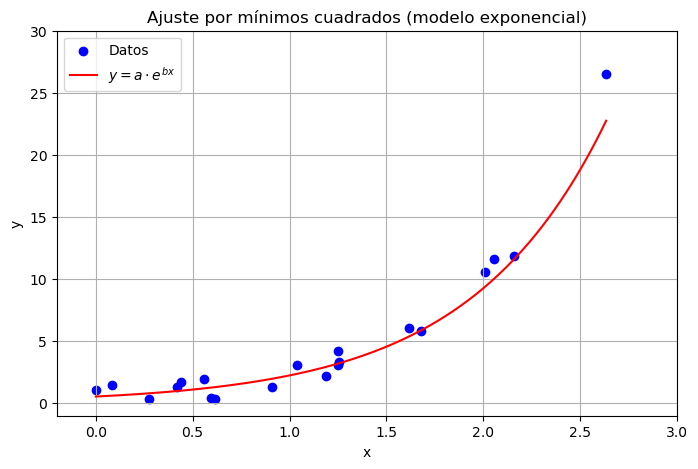

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Definir derivadas parciales para el modelo log(y) = ln(a) + bx
def der_parcial_0(xs, ys):
    Y = np.log(ys)
    return [len(xs), np.sum(xs), np.sum(Y)]

def der_parcial_1(xs, ys):
    Y = np.log(ys)
    return [np.sum(xs), np.sum(np.array(xs)**2), np.sum(np.array(xs) * Y)]

# Ajustar el modelo log(y) = ln(a) + bx
m, b = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1])
a = np.exp(m)  # porque m = ln(a)

# Generar la curva ajustada
x = np.linspace(min(xs2), max(xs2), 200)
y = a * np.exp(b * x)

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(xs2, ys2, label="Datos", color="blue")
plt.plot(x, y, color="red", label=r"$y = a \cdot e^{bx}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados (modelo exponencial)")
plt.legend()
plt.xlim(-0.2, 3)
plt.ylim(-1, 30)
plt.grid(True)
plt.show()